In [2]:
import numpy as np

In [3]:
# define constants in amu
h = 1
m = 1
L = 1

# define grid from -L/2 to L/2
n = 2000  # number of points
x = np.linspace(-L / 2, L / 2, n)

In [4]:
def compute_laplacian(n):
    """
    Constructs the Laplacian matrix for a system with n points in space.

    Parameters:
    n (int): Length of each dimension in calculacted Laplacian.

    Returns:
    numpy.ndarray: Calculated Laplacian matrix of dimensions n x n.
    """
    # create identity matrices
    ident = np.identity(n)
    ident_up = np.diag(np.ones(n - 1), 1)
    ident_down = np.diag(np.ones(n - 1), -1)
    ident_off = ident_up + ident_down
    
    # define dx
    dx = 1 / (n - 1)
    
    # compute matrix
    lp = 1/(dx ** 2) * (-2 * ident + ident_off)
    
    return lp

In [5]:
# calculate Hamiltonian matrix
H = - 0.5 * compute_laplacian(n)

In [6]:
# get eigenvalues and eigenvectors and sort them
eig_values, eig_vectors = np.linalg.eig(H)
inds = np.argsort(eig_values)
eig_values = eig_values[inds]
eig_vectors = eig_vectors[:, inds]

In [7]:
import matplotlib.pyplot as plt

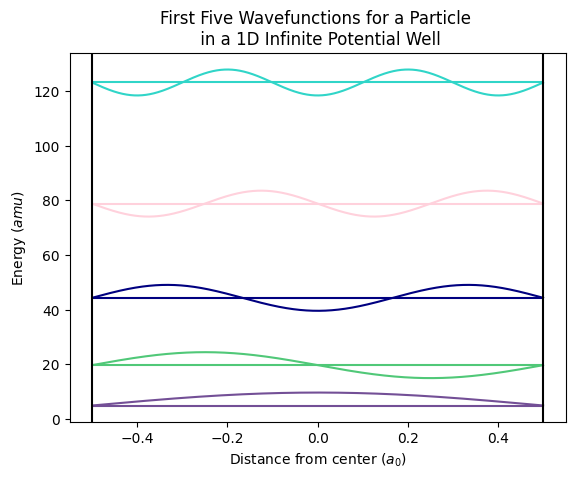

In [11]:
# create color matrix my girlfriend wanted
color_matrix = ['#734F96', '#50C878', '#000080', '#FFD1DC', '#30D5C8']

# add each wavefunction to plot
for i in range(5):
    # shift wavefunction to proper energy level
    y = eig_vectors[:, i]
    
    # store upper and lower domain bounds
    upper = L / 2
    lower = -L / 2
    
    # scale and shift wavefunction
    y = 150 * y + eig_values[i]
    
    # add items to plot
    plt.plot(x, y, color=color_matrix[i])
    plt.hlines(eig_values[i], lower, upper, color=color_matrix[i])
    
# add boundaries
plt.axvline(x=upper, color='black')
plt.axvline(x=lower, color='black')

plt.xlabel('Distance from center ($a_{0}$)')
plt.ylabel('Energy ($amu$)')
plt.title('First Five Wavefunctions for a Particle \n in a 1D Infinite Potential Well')
plt.show()